<a href="https://colab.research.google.com/github/GustavoBD-Dev/StatisticalTechniquesAndDataMining/blob/ModelTimeSeries/RegresionAndTimeSeries/TimeSeries/TimeSeriesARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos ARIMA

> $$ARIMA(p, d, s)(P, D, Q)s$$ $$(Box-jenkis)$$

In [ ]:
%pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

datos = pd.read_spss('/content/ARIMA.SAV')
datos.head()


,ratio,YEAR_,MONTH_,DATE_,FIT_1,ERR_1,LCL_1,UCL_1,SEP_1
0,1.458570,1951.0,1.0,JAN 1951,NaN,NaN,NaN,NaN,NaN
1,1.341631,1951.0,2.0,FEB 1951,NaN,NaN,NaN,NaN,NaN
2,1.228507,1951.0,3.0,MAR 1951,NaN,NaN,NaN,NaN,NaN
3,1.173382,1951.0,4.0,APR 1951,NaN,NaN,NaN,NaN,NaN
4,1.194264,1951.0,5.0,MAY 1951,NaN,NaN,NaN,NaN,NaN


In [ ]:
db = datos[['ratio', 'DATE_']]
db = db.dropna()
db.head()

,ratio,DATE_
0,1.458570,JAN 1951
1,1.341631,FEB 1951
2,1.228507,MAR 1951
3,1.173382,APR 1951
4,1.194264,MAY 1951


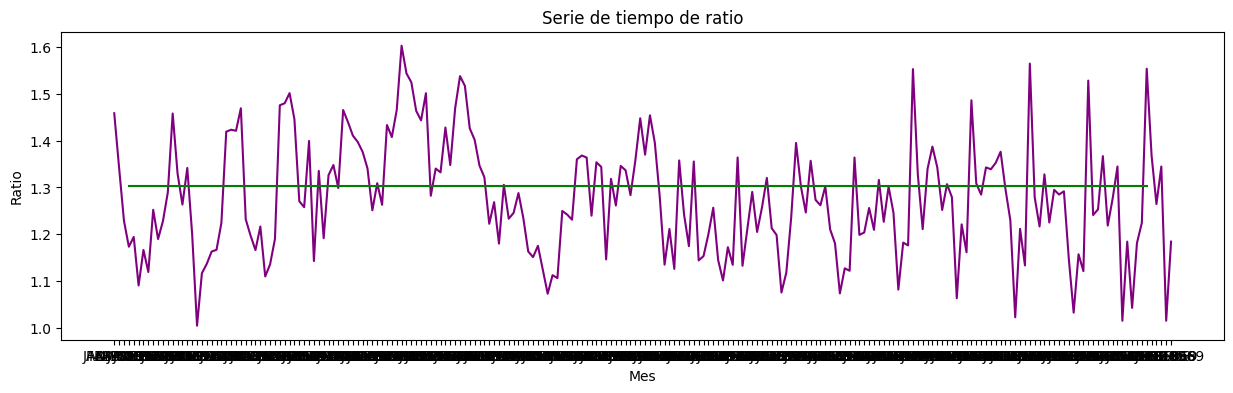

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4), dpi=100)
plt.plot(db['DATE_'], db['ratio'], color='purple')
plt.plot([db['DATE_'].min(), db['DATE_'].max()], [db['ratio'].max()-0.3, db['ratio'].max()-0.3], color='green')
plt.xlabel('Mes')
plt.ylabel('Ratio')
plt.title('Serie de tiempo de ratio')
plt.show()

### Análisis exploratorio de la serie: Dispersión y FAC FACP

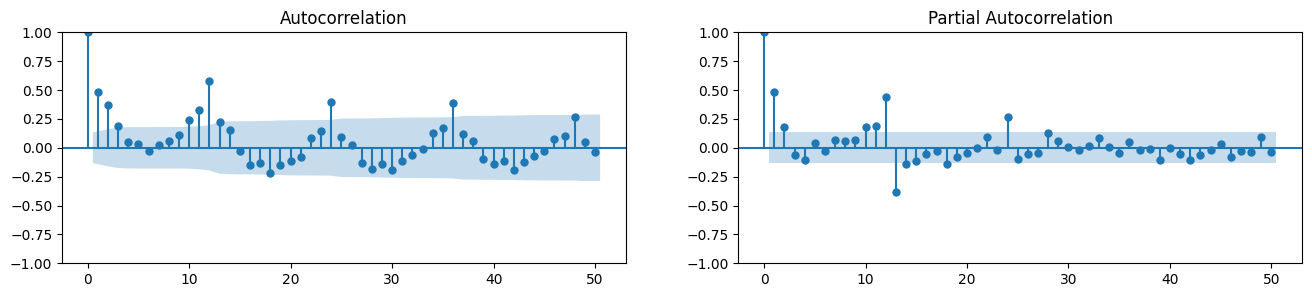

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)
plot_acf(db['ratio'], lags=50, ax=axes[0])
plot_pacf(db['ratio'], lags=50, ax=axes[1])
plt.show()

1. FAC: Retardos múltiplos del periodo estacional.
2. FACP: retardos significativos correspondientes al periodo.


Estructura estacional mensual, comprobación.

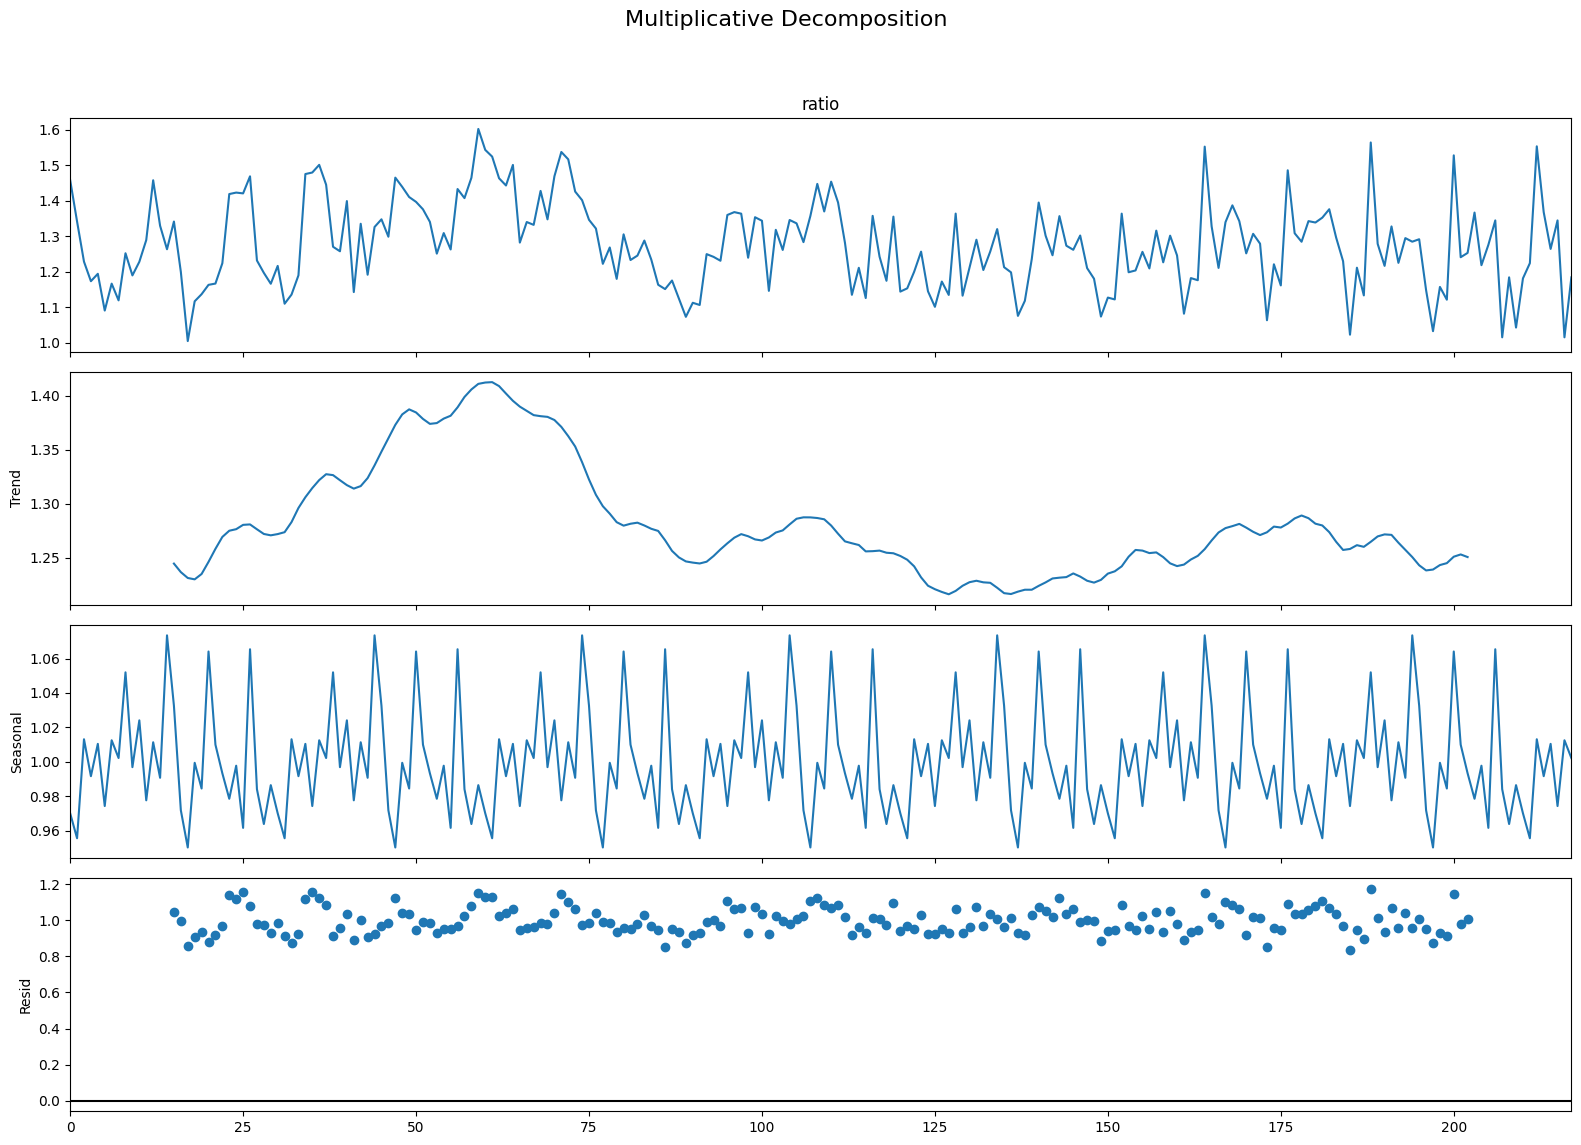

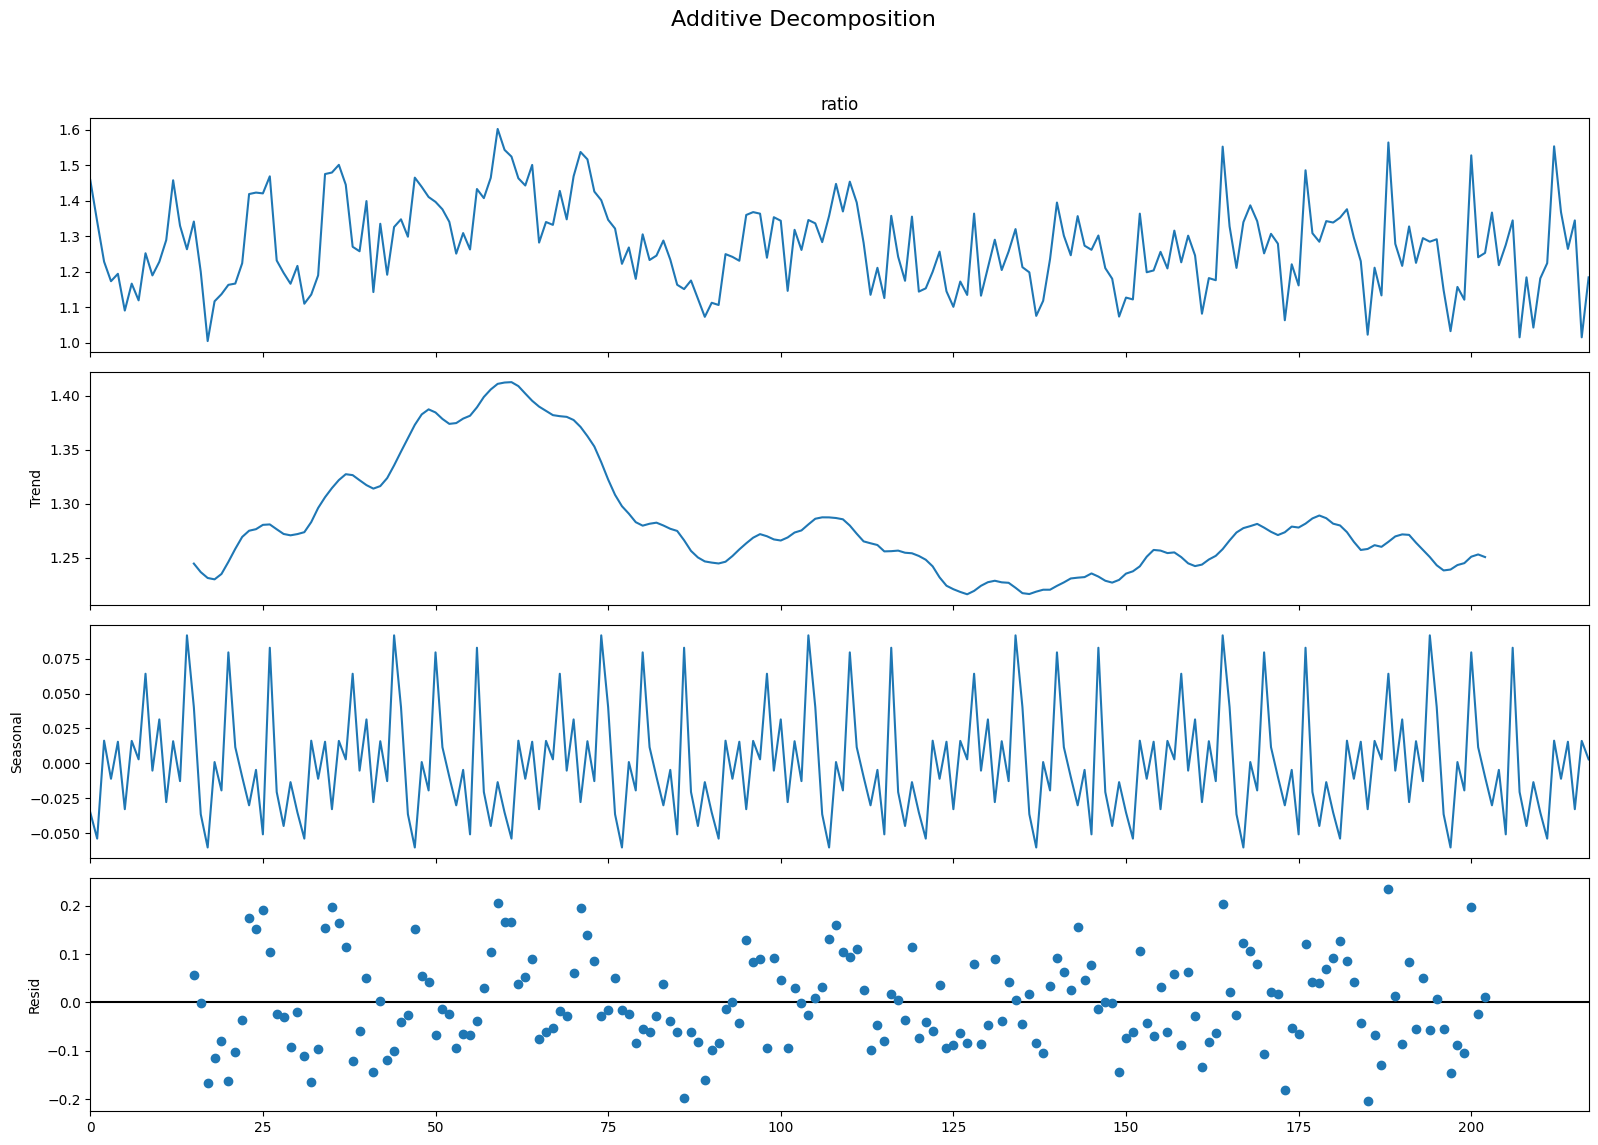

In [ ]:
# Punto 2 Descomposición
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(db['ratio'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(db['ratio'], model='additive', period=30)

# GRAFICACIÓN
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

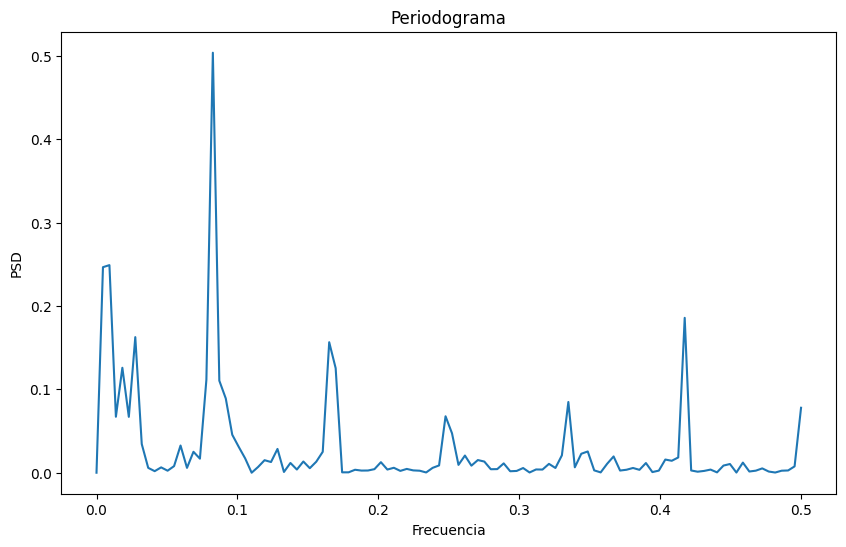

In [ ]:
# periodograma espectral
from scipy.signal import periodogram

frecuencias, psd = periodogram(db['ratio'])
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(frecuencias, psd)
plt.xlabel('Frecuencia')
plt.ylabel('PSD')
plt.title('Periodograma')
plt.show()

El segundo pico nos muestra el valor de la estacionalidad.

Cada $\frac{1}{0.08} = 12 meses$ es la estacionalidad.

Hay que atenuar la no estacionalidad.

Diferenciar la serie (regular) y/o aplicar logaritmos u otra transformación.

### Logaritmos de la parte regular de la serie

In [ ]:
db['ratio_log'] = np.log(db['ratio'])
db.head()

,ratio,DATE_,ratio_log
0,1.458570,JAN 1951,0.377456
1,1.341631,FEB 1951,0.293886
2,1.228507,MAR 1951,0.205800
3,1.173382,APR 1951,0.159890
4,1.194264,MAY 1951,0.177530


Ahora aplicamos diferencia estacional para atenuear y lograr la estacionariedad

### Diferenciar la parte estacional

In [ ]:
# Si tu serie ya está en un DataFrame, la extraes así:
serie_temporal = db['ratio_log'].dropna()
# Determinar la periodicidad estacional (por ejemplo, 12 para datos mensuales con estacionalidad anual)
periodicidad = 12
# Aplicar la diferencia estacional
diferencia_estacional = serie_temporal.diff(periods=periodicidad)
# Eliminar NaN generados por la diferencia estacional
diferencia_estacional = diferencia_estacional.dropna()

Text(0, 0.5, 'Ratio')

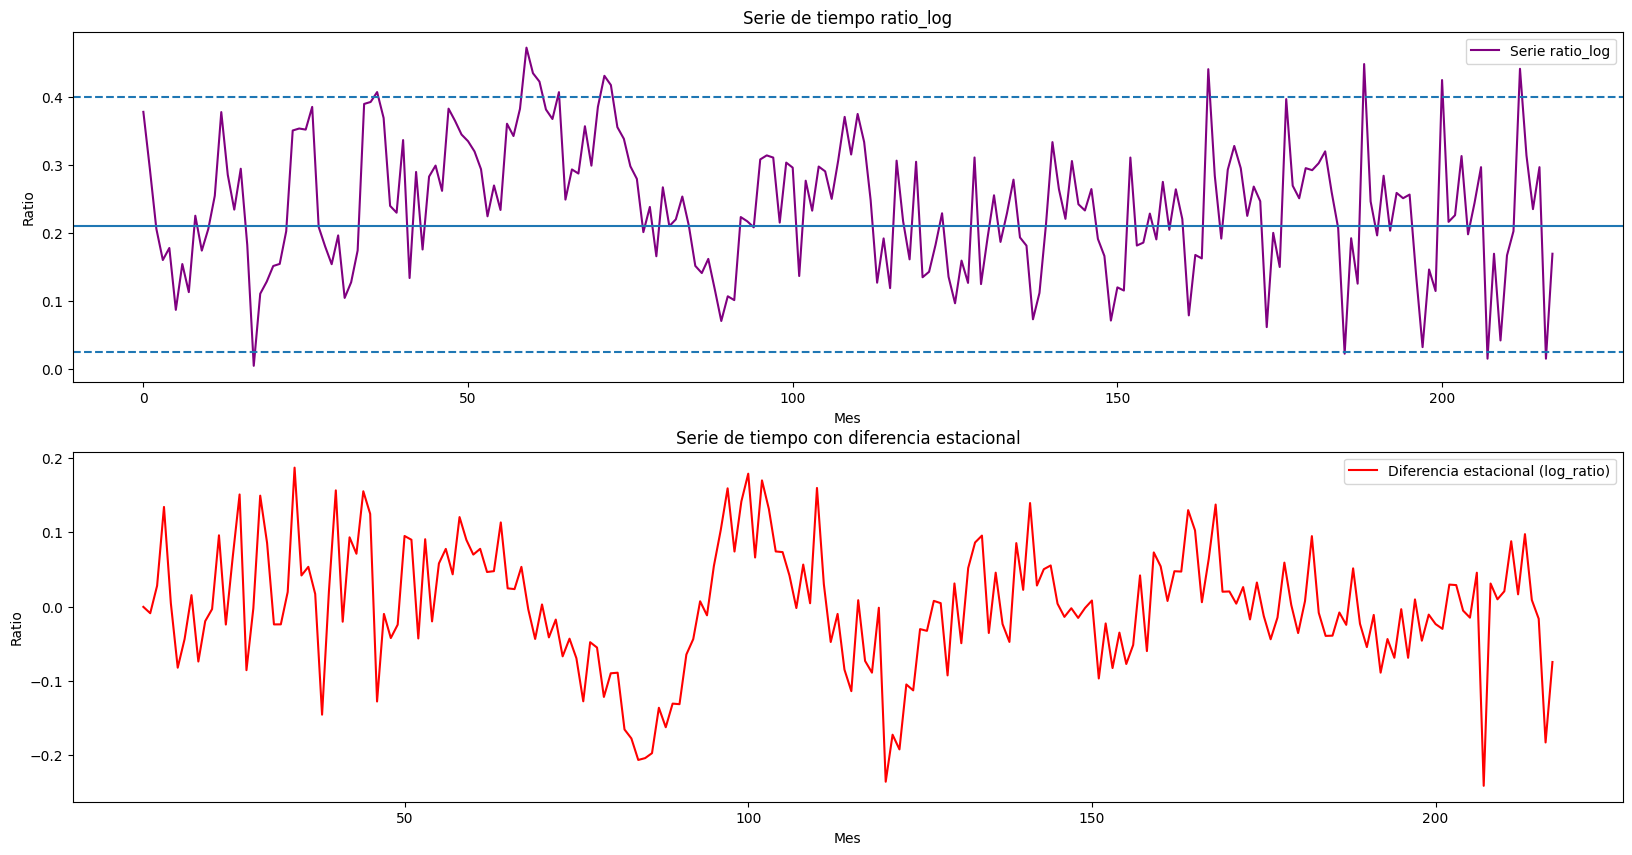

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)

plt.subplot(2, 1, 1)
plt.plot(serie_temporal,label='Serie ratio_log', color='purple')
plt.axhline(0.21)
plt.axhline(0.4, linestyle='--')
plt.axhline(0.025, linestyle='--')
plt.title('Serie de tiempo ratio_log')
plt.xlabel('Mes')
plt.ylabel('Ratio')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(diferencia_estacional,label='Diferencia estacional (log_ratio)', color='red')
plt.title('Serie de tiempo con diferencia estacional')
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Ratio')

Ya se corrigió la estacionalidad.
FAC y FACP de la diferencia estacional

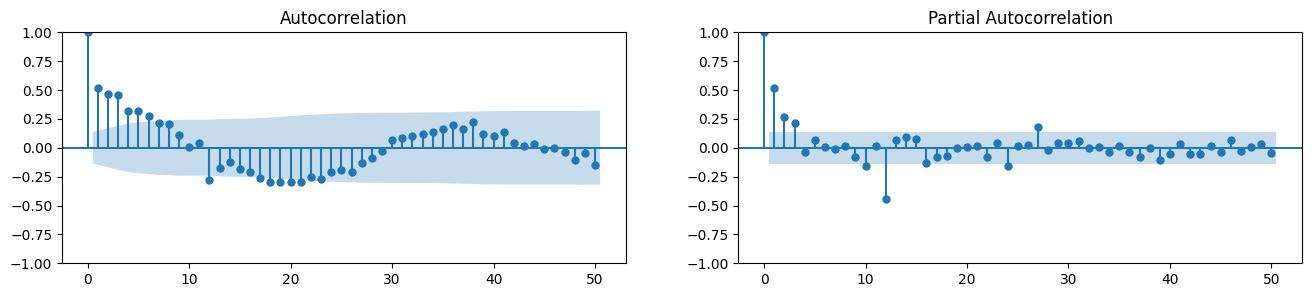

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)
plot_acf(diferencia_estacional, lags=50, ax=axes[0])
plot_pacf(diferencia_estacional, lags=50, ax=axes[1])
plt.show()

El primer periodo estacional _(en 12)_ es _significativo_.

En autocorrelación parcial, los datos se encuentran dentro de las bandas de confianza.

* FAC: supera la estacionariedad.
* FACP: supera la estacionaridad.

Además, la FAC muestra que los retardos múltiplos del periodo estacional de la serie no son significativos.

Por lo tanto, se ha corregido la no estacionariedad en media y la estacionariedad (aplicando la diferencia a la parte estacional).

Asi mismo, se ha corregido la NO estacionariedad en varianza por medio de logaritmo (previamente, a la parte regular de la serie).




## Estimación de la SARIMA

Especifica los parámetros $(p, d, q)$ para el componente no estacional y $(P, D, Q, S)$ para el componente estacional.

1. $p$: número de rezagos (autoregresivo).
2. $d$: grado de diferenciación.
3. $q$: orden del componente de media móvil.
4. $P, D, Q$: análogos a los anteriores, pero para la parte estacional.
5. $S$: período de la estacionariedad (ejemplo: 12 para los datos mensuales con estacionariedad anual, etc.).

#### Identificación de los parametros del modelo, una opción es:

> Parte regular:

En ambas gráficas no se anulan bruscamente con periodicidades, es decir:

* FAC: decae rápida y sinusoidalmente y FACP: sólo un coeficiente es significativo: $AR(p=1)$.
* FAC: solo el primero es significativo y FACP: decae rápidamente, $MA(q=1)$.

> Parte estacional

* FAC: Decae en forma de ábanico o abaico-sonusoidal (primer retardo es significativo), $AR(0)$ ó $AR(1)$.
* FACP: solo el primer retardo es significativo y hay un segundo coeficiente de autocorrelación parcial correspondiente al segundo periodo estacional "intenta" ser significativo, $MA(1)$.

Modelo tentativo: $ARIMA(p=1, d=0, q=1) (P = 0, D = 1, Q = 1)s = 12$, es decir,

$$ARIMA(1,0,1)(0, 1, 1)_{12}$$

Recordando FAC y FACP:


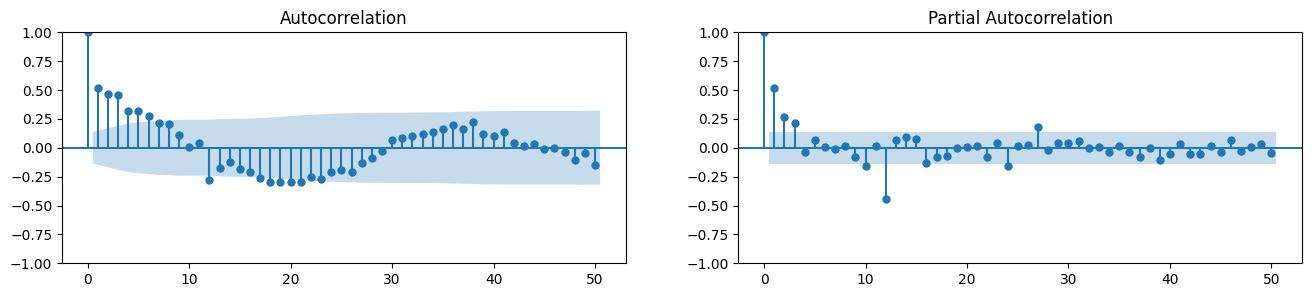

In [ ]:
#Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(diferencia_estacional.tolist(), lags=50, ax=axes[0])  #tolist() los datos los comvierta a una lista
plot_pacf(diferencia_estacional.tolist(), lags=50, ax=axes[1]);

### Estimación

* Primer modelo

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

SARIMA_model = SARIMAX(serie_temporal, order=(1,0,1), seasonal_order=(1,1,1,12))
SARIMA_model_fit = SARIMA_model.fit()
print(SARIMA_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          ratio_log   No. Observations:                  218
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                 296.523
Date:                            Sat, 31 Aug 2024   AIC                           -583.046
Time:                                    05:53:04   BIC                           -566.407
Sample:                                         0   HQIC                          -576.317
                                            - 218                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9112      0.053     17.157      0.000       0.807       1.015
ma.L1         -0.5345      0.096   

$sigma2:$ varianza del error. \

- `ma.L1` significativo

$Kurtosis=5.49$ muy alejado



## Segundo modelo

In [ ]:
SARIMA_model = SARIMAX(serie_temporal, order=(2,0,1), seasonal_order=(1,1,1,12))
SARIMA_model_fit = SARIMA_model.fit()
print(SARIMA_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          ratio_log   No. Observations:                  218
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 12)   Log Likelihood                 291.916
Date:                            Sat, 31 Aug 2024   AIC                           -571.832
Time:                                    05:53:17   BIC                           -551.865
Sample:                                         0   HQIC                          -563.757
                                            - 218                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0964      0.125      8.767      0.000       0.851       1.342
ar.L2         -0.0976      0.125   

$Kurtosis = 5.10$, el valor de 3 indica que es una campana, se achata, pero aun asi se mantiene la simetria. \

## Tercer modelo

In [ ]:
SARIMA_model = SARIMAX(serie_temporal, order=(1,0,1), seasonal_order=(0,1,1,12))
SARIMA_model_fit = SARIMA_model.fit()
print(SARIMA_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          ratio_log   No. Observations:                  218
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 295.964
Date:                            Sat, 31 Aug 2024   AIC                           -583.929
Time:                                    05:53:30   BIC                           -570.617
Sample:                                         0   HQIC                          -578.545
                                            - 218                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9043      0.055     16.373      0.000       0.796       1.013
ma.L1         -0.5303      0.099   

## Modelo matemático ajustado

La serie original $Y_t$ se le aplicó $log(Y_t) = X_t$ \
El modelo que se ha estimado es
$$ARIMA(1,0,1)(0,1,1,)_{12}$$
Que se traduce a la siguiente ecuación:
$$log(X_t)-log(X_{t-12}) = \phi_1 log(X_{t-1}) - \phi_1 log(X_{t-13})  + e_t + v_1 e_{t-1} + V_1 e_{t-12} + V_1e_{t-13}$$
El término $AR(1)= \phi = 0.9044$ expresa como:
$$0.9044*log(X_t)-0.9044*log(X_{t-13})$$
El termino $MA(1) = v_1 = -0-5306$ se expresa como:
$$-0.506*e_{t-1}$$
El componente estacional $SMA(1)=V_1 = -0.6305$ que se expresa como:
$$-0.6305*e_{t-12}-0.6305*e_{t-13}$$

El modelo es:

$$log(X_t)-log(X_{t-12}) = 0.9044[ log(X_{t-1}) - log(X_{t-13})]  + e_t - 0.6305[ e_{t-1}] + - 0.6305[e_{t-12} + e_{t-13}]$$

y $e_t ~ N(0, 0.0032)$, finalmente reorganizando la escuación:

$$
log(\frac{X_t}{X_{t-12}}) = 0.9044 * log(\frac{X_{t-1}}{X_{t-13}}) + e_t - 0.5306e_{t-1} - 0.6305)e_{t-12} + e_{t-13})
$$

$$\frac{Y_t}{Y_{t-12}} =  \left(\frac{Y_{t-1}}{Y_{t-13}}\right)^{0.9044}\cdot \exp^{e_t-0.5306e_{t-1}-0.6305(e_{t-12}+e_{t-13})}$$

$$\frac{Y_t}{Y_{t-12}} =  \left(\frac{Y_{t-1}}{Y_{t-13}}\right)^{0.9044}\cdot \exp^{e_t-0.5306e_{t-1}-0.6305(e_{t-12}+e_{t-13})}$$

$$Y_t=Y_{t-12}\cdot \left(\frac{Y_{t-1}}{Y_{t-13}}\right)^{0.9044}\cdot \exp ^{e_t-0.5306e_{t-1}-0.6305(e_{t-12}+e_{t-13})}$$

## analisis de Residuales

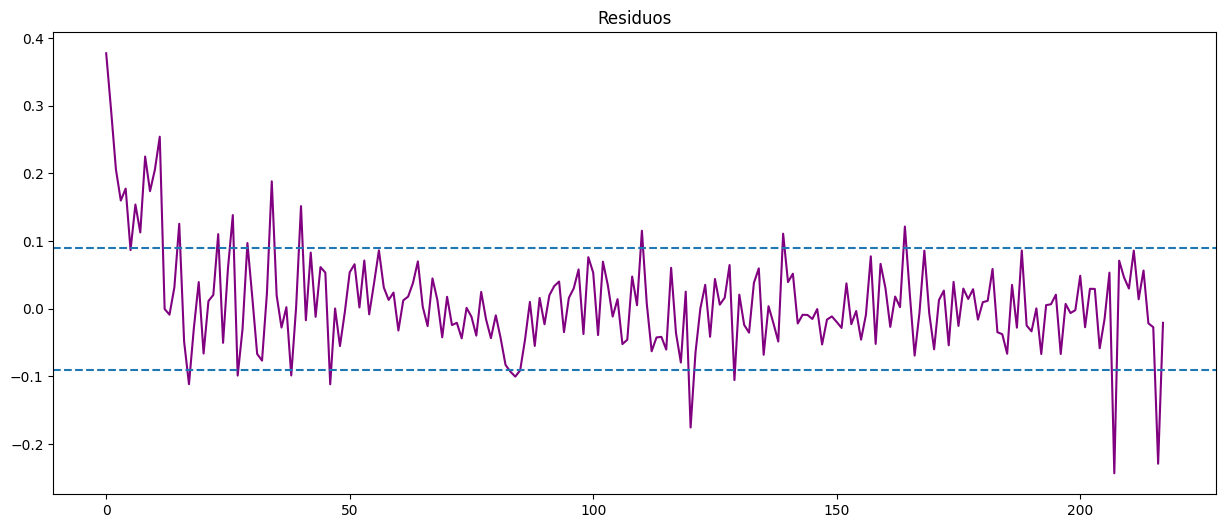

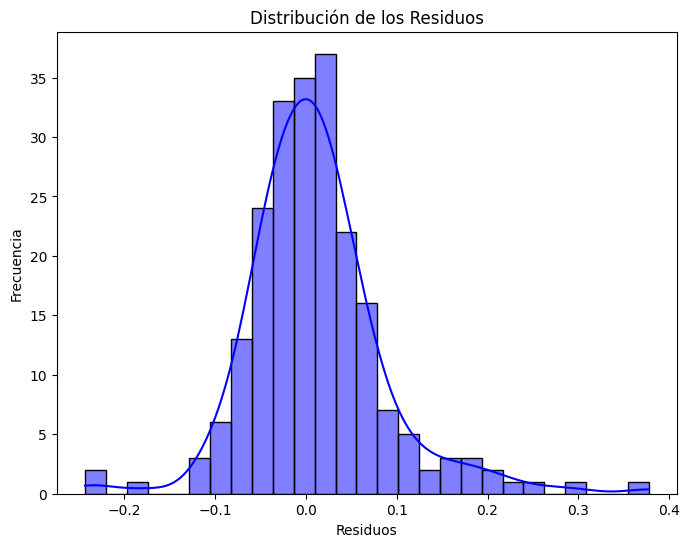

In [ ]:
import matplotlib.pyplot as plt

residuos = SARIMA_model_fit.resid

# Gráfica de los residuos
plt.figure(figsize=(15, 6), dpi=100)
plt.plot(residuos, color='purple')
plt.axhline(-0.09, linestyle='--')
plt.axhline(0.09, linestyle='--')
plt.title('Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(8, 6), dpi=100)
sns.histplot(residuos, kde=True, color='blue')
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
from scipy.stats import normaltest
print(normaltest(residuos))

NormaltestResult(statistic=54.50132928508212, pvalue=1.4628059478949788e-12)


### Predicciones del SARIMA

In [ ]:
predictions = SARIMA_model_fit.get_forecast(len(db.index))
predictions_df = predictions.conf_int(alpha = 0.05)
predictions_df["Predictions"] = SARIMA_model_fit.predict(start = predictions_df.index[0], end = predictions_df.index[-1])
predictions_df.index = db.index
predictions_sarima = predictions_df["Predictions"]

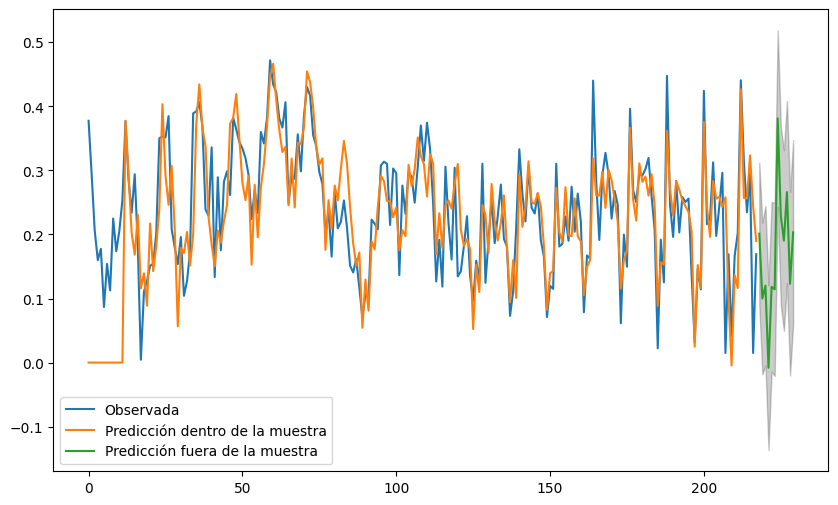

In [ ]:
# Predicción dentro de la muestra
pred_in = SARIMA_model_fit.predict(start = predictions_df.index[0], end = predictions_df.index[-1], dynamic=False)

# Predicción fuera de la muestra
pred_fuera = SARIMA_model_fit.get_forecast(steps=12)
intervalo_confianza = pred_fuera.conf_int()

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal, label='Observada')
plt.plot(pred_in, label='Predicción dentro de la muestra')
plt.plot(pred_fuera.predicted_mean, label='Predicción fuera de la muestra')
plt.fill_between(intervalo_confianza.index,
                 intervalo_confianza.iloc[:, 0],
                 intervalo_confianza.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.show()

### Calculo de RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_sarima = np.sqrt(mean_squared_error(db['ratio_log'].values, predictions_df["Predictions"]))
print("RMSE: ",rmse_sarima)

RMSE:  0.1453689168389023


## Pronóstico dentro de la serie

0      0.000000e+00
1      1.264416e-09
2      2.067809e-09
3      2.446123e-09
4      2.589722e-09
           ...     
213    2.569215e-01
214    2.561465e-01
215    3.234447e-01
216    2.439171e-01
217    1.898818e-01
Length: 218, dtype: float64


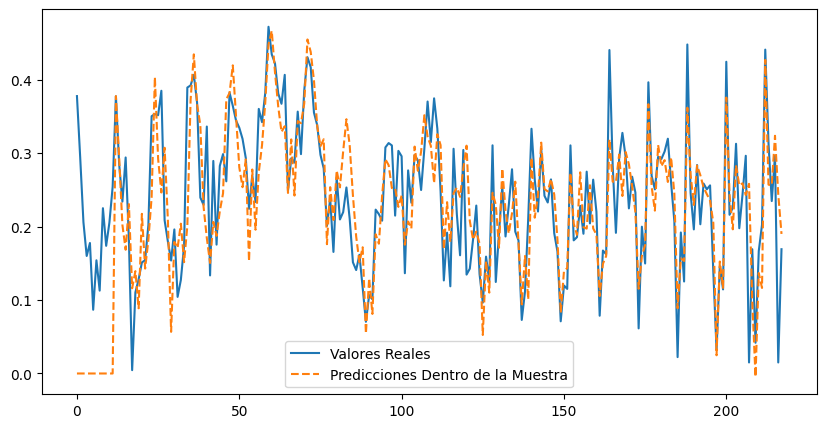

In [ ]:
# Predicción dentro de la muestra
in_sample_forecast = SARIMA_model_fit.fittedvalues

# Puedes imprimir los valores para verlos
print(in_sample_forecast)

# También puedes comparar con los valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(serie_temporal, label='Valores Reales')
plt.plot(in_sample_forecast, label='Predicciones Dentro de la Muestra', linestyle='--')
plt.legend()
plt.show()

### Pronóstico fuera de la serie


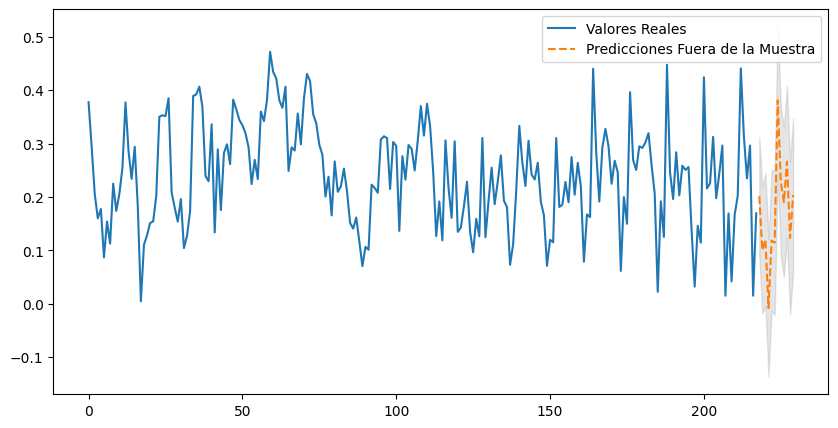

In [ ]:
# Especifica el número de períodos que deseas predecir
num_periods = 12  # Por ejemplo, predice 12 períodos hacia adelante

# Realizar la predicción fuera de la muestra
out_of_sample_forecast = SARIMA_model_fit.get_forecast(steps=num_periods)

# Obtén las predicciones en forma de serie temporal
forecast_values = out_of_sample_forecast.predicted_mean

# Obtén el intervalo de confianza de las predicciones
conf_int = out_of_sample_forecast.conf_int()

# Visualización de la predicción fuera de la muestra
plt.figure(figsize=(10,5))
plt.plot(serie_temporal, label='Valores Reales')
plt.plot(forecast_values, label='Predicciones Fuera de la Muestra', linestyle='--')
plt.fill_between(forecast_values.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.show()

$$log(X_t)-log(X_{t-12})=0.9044 [log(X_t)-log(X_{t-13}]+e_t-0.6305[e_{t-1}]-0.6305[e_{t-12}-e_{t-13}]$$

Finalmente, el RMSE dentro de la muestra:


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Valores reales dentro de la muestra
actual_values_in_sample = serie_temporal

# Valores predichos dentro de la muestra
predicted_values_in_sample = SARIMA_model_fit.fittedvalues

# Calcular el RMSE dentro de la muestra
rmse_in_sample = np.sqrt(mean_squared_error(actual_values_in_sample, predicted_values_in_sample))

print(f"RMSE dentro de la muestra: {rmse_in_sample}")

RMSE dentro de la muestra: 0.07561550077174241



```
# Supongamos que tienes los valores reales fuera de la muestra
# Por ejemplo, si estás prediciendo 12 períodos hacia adelante, necesitas tener esos valores:
 actual_values_out_of_sample = ...  # Reemplaza con los valores reales futuros

# Valores predichos fuera de la muestra
predicted_values_out_of_sample = forecast_values  # De la predicción fuera de la muestra

# Calcular el RMSE fuera de la muestra
rmse_out_of_sample = np.sqrt(mean_squared_error(actual_values_out_of_sample, predicted_values_out_of_sample))

print(f"RMSE fuera de la muestra: {rmse_out_of_sample}")
```



### Fin Box-Jenkins

> Generamos valores ficticios

In [ ]:
import pandas as pd
import numpy as np

# Número de períodos futuros
num_periods = 12

# Generar datos ficticios futuros (puedes ajustar la media y desviación estándar)
np.random.seed(42)  # Fijar semilla para reproducibilidad
media_futura = serie_temporal.mean()
desviacion_estandar_futura = serie_temporal.std()

# Generar valores futuros ficticios con una tendencia y componente aleatorio
actual_values_out_of_sample = media_futura + np.random.randn(num_periods) * desviacion_estandar_futura

# Crear un índice de tiempo para los futuros valores
fecha_final = serie_temporal.index[-1]
indice_futuro = pd.date_range(start=fecha_final, periods=num_periods+1, freq='M')[1:]

# Crear una serie temporal con los valores ficticios futuros
actual_values_out_of_sample = pd.Series(actual_values_out_of_sample, index=indice_futuro)

# Mostrar los valores ficticios futuros
print(actual_values_out_of_sample)

1970-02-28 00:00:00.000000217    0.286817
1970-03-31 00:00:00.000000217    0.225703
1970-04-30 00:00:00.000000217    0.301348
1970-05-31 00:00:00.000000217    0.385596
1970-06-30 00:00:00.000000217    0.216474
1970-07-31 00:00:00.000000217    0.216476
1970-08-31 00:00:00.000000217    0.391003
1970-09-30 00:00:00.000000217    0.312873
1970-10-31 00:00:00.000000217    0.193826
1970-11-30 00:00:00.000000217    0.291230
1970-12-31 00:00:00.000000217    0.194409
1971-01-31 00:00:00.000000217    0.194186
Freq: M, dtype: float64


Y futuros

In [ ]:
# Calcular el RMSE fuera de la muestra
rmse_out_of_sample = np.sqrt(mean_squared_error(actual_values_out_of_sample, forecast_values))

print(f"RMSE fuera de la muestra: {rmse_out_of_sample}")

RMSE fuera de la muestra: 0.1426029520677445
